# Set up

Load packages. 

In [1]:
using Optim
using LinearAlgebra
using Distributions
using ForwardDiff
using KernelDensity
using PyPlot
using Random

# Problem 1 

Load data. 

In [2]:
file = open("eBayNumberOfBidderData.dat")
data_file = readlines(file)
close(file)

# load convaraites and targets
nbr_obs = 1000
nbr_covariates = 9
X = zeros(nbr_covariates,nbr_obs)
y = zeros(nbr_obs)

for i = 1:nbr_obs
    file_line = split(data_file[i+1])
    for j = 1:nbr_covariates
        X[j,i] = parse(Float64,file_line[j+1])
    end
    y[i] = parse(Float64,file_line[1])
end


Set random numbers.

In [3]:
Random.seed!(1234);

set prior distribution 

In [4]:
τ_0 = 10
prior_cov_m = τ_0^2*Matrix{Float64}(I, nbr_covariates, nbr_covariates)
prior_cov_m_inv = inv(prior_cov_m)
dist_marginal_prior = Normal(0, τ_0)

Normal{Float64}(μ=0.0, σ=10.0)

Set log-posterior function.

In [5]:
# logposterior function
function logposterior(β)

    logpos = 0.

    for i = 1:nbr_obs

        logpos = logpos + ((X[:,i]'*β)*y[i] - exp(X[:,i]'*β))

    end

    logpos = logpos - 0.5*β'prior_cov_m_inv*β

    return -logpos # Optim does minimization, hence the minus sign

end


logposterior (generic function with 1 method)

Run optimization.

In [6]:
# start values for optimizer
β_start = ones(nbr_covariates)

# run optimization using conjugate gradient decent with numerical gradients
opt = optimize(logposterior, β_start, ConjugateGradient())

# get parameter estimations (posterior mean)
β_tilde = Optim.minimizer(opt)

# get Hessian
numerical_hessian = Symmetric(ForwardDiff.hessian(logposterior, β_tilde));


Sample from approximate posterior.

In [7]:
posterior_mean = β_tilde

posterior_cov_m = inv(-numerical_hessian) + 10^(-2)*Matrix{Float64}(I, nbr_covariates, nbr_covariates) # insure that Hessian is pos. semi. def.

approx_posterior = MvNormal(posterior_mean, posterior_cov_m)

posterior_samples = rand(approx_posterior, 10^4)


9×10000 Array{Float64,2}:
  1.15498     1.02326     1.07931    …   0.989589     1.00614     1.01021  
 -0.0976157  -0.0763718  -0.159349      -0.139477    -0.090459   -0.0499097
 -0.410206   -0.396319   -0.333692      -0.420524    -0.411185   -0.392701 
  0.357929    0.451024    0.35472        0.296939     0.385632    0.516464 
  0.0253699   0.0929235   0.0489764     -0.185087    -0.141807   -0.132344 
 -0.130246   -0.26501    -0.276281   …  -0.241378    -0.234388   -0.23581  
  0.0999084   0.087001   -0.182882       0.00184707   0.0561887   0.14876  
 -0.140344   -0.147986   -0.132053      -0.0764661   -0.0461264  -0.0888188
 -1.88493    -1.85875    -1.8766        -1.89645     -1.79529    -1.75254  

Print posterior statistics. 

In [8]:
println("Posterior (marginal) means:")
println(round.(mean(posterior_samples,dims = 2); digits=3))

println("Posterior (marginal) std:")
println(round.(std(posterior_samples,dims = 2); digits=3))

Posterior (marginal) means:
[1.072; -0.021; -0.395; 0.444; -0.052; -0.22; 0.07; -0.121; -1.893]
Posterior (marginal) std:
[0.095; 0.093; 0.038; 0.086; 0.08; 0.041; 0.082; 0.095; 0.07]


Plot maginal posteriors. 

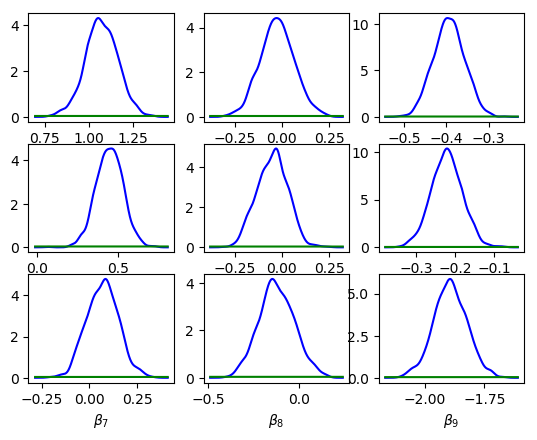

PyObject Text(0.5,28,'$\\beta_9$')

In [31]:
# compute kernel density est. for the marginal posteriors
h1_β1 = kde(posterior_samples[1,:])
h1_β2 = kde(posterior_samples[2,:])
h1_β3 = kde(posterior_samples[3,:])
h1_β4 = kde(posterior_samples[4,:])
h1_β5 = kde(posterior_samples[5,:])
h1_β6 = kde(posterior_samples[6,:])
h1_β7 = kde(posterior_samples[7,:])
h1_β8 = kde(posterior_samples[8,:])
h1_β9 = kde(posterior_samples[9,:])

# plot marginal post.

text_size = 10
PyPlot.figure()
PyPlot.subplot(331)
PyPlot.plot(h1_β1.x,h1_β1.density, "b")
PyPlot.plot(h1_β1.x,pdf.(dist_marginal_prior, h1_β1.x), "g")
PyPlot.xlabel(L"\beta_1",fontsize=text_size)
PyPlot.subplot(332)
PyPlot.plot(h1_β2.x,h1_β2.density, "b")
PyPlot.plot(h1_β2.x,pdf.(dist_marginal_prior, h1_β2.x), "g")
PyPlot.xlabel(L"\beta_2",fontsize=text_size)
PyPlot.subplot(333)
PyPlot.plot(h1_β3.x,h1_β3.density, "b")
PyPlot.plot(h1_β3.x,pdf.(dist_marginal_prior, h1_β3.x), "g")
PyPlot.xlabel(L"\beta_3",fontsize=text_size)
PyPlot.subplot(334)
PyPlot.plot(h1_β4.x,h1_β4.density, "b")
PyPlot.plot(h1_β4.x,pdf.(dist_marginal_prior, h1_β4.x), "g")
PyPlot.xlabel(L"\beta_4",fontsize=text_size)
PyPlot.subplot(335)
PyPlot.plot(h1_β5.x,h1_β5.density, "b")
PyPlot.plot(h1_β5.x,pdf.(dist_marginal_prior, h1_β5.x), "g")
PyPlot.xlabel(L"\beta_5",fontsize=text_size)
PyPlot.subplot(336)
PyPlot.plot(h1_β6.x,h1_β6.density, "b")
PyPlot.plot(h1_β6.x,pdf.(dist_marginal_prior, h1_β6.x), "g")
PyPlot.xlabel(L"\beta_6",fontsize=text_size)
PyPlot.subplot(337)
PyPlot.plot(h1_β7.x,h1_β7.density, "b")
PyPlot.plot(h1_β7.x,pdf.(dist_marginal_prior, h1_β7.x), "g")
PyPlot.xlabel(L"\beta_7",fontsize=text_size)
PyPlot.subplot(338)
PyPlot.plot(h1_β8.x,h1_β8.density, "b")
PyPlot.plot(h1_β8.x,pdf.(dist_marginal_prior, h1_β8.x), "g")
PyPlot.xlabel(L"\beta_8",fontsize=text_size)
PyPlot.subplot(339)
PyPlot.plot(h1_β9.x,h1_β9.density, "b")
PyPlot.plot(h1_β9.x,pdf.(dist_marginal_prior, h1_β9.x), "g")
PyPlot.xlabel(L"\beta_9",fontsize=text_size)

Sample from posterior predictive distribution. 

In [10]:
posterior_samples = rand(approx_posterior, 10^3)
posterior_pred_bids = zeros(10^3)

x_case = [1, 1, 1, 1, 0, 0, 0, 1, 0.5]

for i = 1:10^3
    sample_bids = Poisson(exp(x_case'*posterior_samples[:,i]))
    posterior_pred_bids[i] = rand(sample_bids)
end


Print posterior predictive statistics. 

In [11]:
println("Posterior predictive mean:")
println(mean(posterior_pred_bids))

println("Posterior predictive std:")
println(std(posterior_pred_bids))


Posterior predictive mean:
1.043
Posterior predictive std:
1.0603184782296664


Plot posterior predictive. 

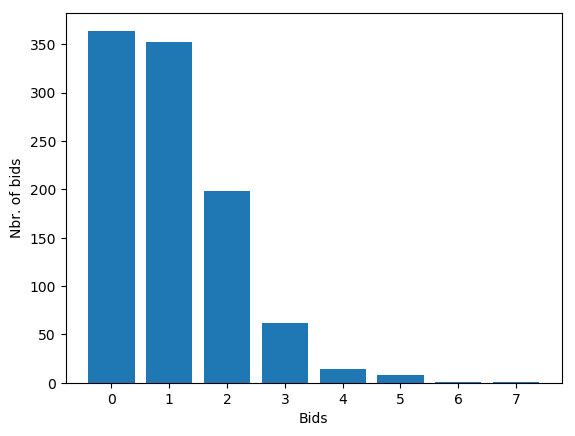

PyObject Text(24,0.5,'Nbr. of bids')

In [30]:
max_bids = Int(maximum(posterior_pred_bids))
nbr_bids = zeros(max_bids+1)

for i = 0:max_bids
    nbr_bids[i+1] = length(findall(x->x==i, posterior_pred_bids))
end



PyPlot.figure()
b = bar(0:max_bids,nbr_bids)
PyPlot.xlabel("Bids",fontsize=text_size)
PyPlot.ylabel("Nbr. of bids",fontsize=text_size)



# Problem 2 

Load data. 

In [13]:
file = open("bivarnormal.dat")
data_file = readlines(file)
close(file)

# load data
nbr_obs = 20
dimensions = 2
X = zeros(dimensions,nbr_obs)


for i = 1:nbr_obs
    file_line = split(data_file[i+1])
    for j = 1:dimensions
        if file_line[j] == "NA"
            X[j,i] = NaN
        else
            X[j,i] = parse(Float64,file_line[j])
        end
    end
end

Set random numbers.

In [14]:
Random.seed!(1234);

Replace missing values at random with other values.

In [15]:
# Random replacment of NaN
X_data_not_nan = zeros(2,nbr_obs-3)
X_data_not_nan[:,1:2] = X[:,1:2]
X_data_not_nan[:,3:end] = X[:,6:end]

X[1,3:4] = sample(X_data_not_nan[1,:],2)
X[2,5] = sample(X_data_not_nan[2,:],1)[1]

4.937272

## First task: Gibbs sampler 

Set prior distribution.

In [16]:
Σ_0 = 10^2*Matrix{Float64}(I, dimensions, dimensions)
μ_0 = zeros(dimensions)
dist_marginal_prior = Normal(0, 10)


Normal{Float64}(μ=0.0, σ=10.0)

Data model. 

In [17]:
Σ = [1 1.5; 1.5 4]
# The mean is unknown

2×2 Array{Float64,2}:
 1.0  1.5
 1.5  4.0

Compute joint posterior. (See https://en.wikipedia.org/wiki/Conjugate_prior#When_likelihood_function_is_a_continuous_distribution).

In [18]:
x_bar = mean(X, dims = 2) # sample mean
μ_post = inv((inv(Σ_0)+nbr_obs*inv(Σ)))*(inv(Σ_0)*μ_0 + nbr_obs*inv(Σ)*x_bar)
Σ_post = inv((inv(Σ_0)+nbr_obs*inv(Σ)))


2×2 Array{Float64,2}:
 0.0499189  0.0748129
 0.0748129  0.199545 

Set Gibbs sampler. 

In [19]:
# Gibbs sampler
function gibbs(N_samples, μ_post = μ_post, Σ_post = Σ_post)

    # construct conditional dists
    μ_post_1 = μ_post[1]
    μ_post_2 = μ_post[2]

    Σ_post_11 = Σ_post[1,1]
    Σ_post_22 = Σ_post[2,2]
    Σ_post_12 = Σ_post[1,2]

    # pre-allocate matrix
    μ_post_sample = zeros(dimensions, N_samples)

    # set start value
    μ_2_old = 100

    for i = 1:N_samples

        # sample 1 give 2
        post_cond_1_give_2_m = μ_post_1+Σ_post_12*inv(Σ_post_22)*(μ_2_old-μ_post_2)
        post_cond_1_give_2_std = sqrt(Σ_post_11 - Σ_post_12*inv(Σ_post_22)*Σ_post_12)
        sample_cond_1_give_2 = rand(Normal(post_cond_1_give_2_m, post_cond_1_give_2_std))

        # sample 2 give 1
        post_cond_2_give_1_m = μ_post_2+Σ_post_12*inv(Σ_post_11)*(sample_cond_1_give_2-μ_post_1)
        post_cond_2_give_1_std = sqrt(Σ_post_22 - Σ_post_12*inv(Σ_post_11)*Σ_post_12)
        sample_cond_2_give_1 = rand(Normal(post_cond_2_give_1_m, post_cond_2_give_1_std))

        # store samples
        μ_post_sample[:,i] = [sample_cond_1_give_2;sample_cond_2_give_1]

        # update 2 give 1
        μ_2_old = sample_cond_2_give_1

    end

    return μ_post_sample

end

gibbs (generic function with 3 methods)

Run gibbs sampler.

In [20]:
nbr_samples = 10^3
burn_in = 100
post_samples = gibbs(nbr_samples+burn_in)


2×1100 Array{Float64,2}:
 39.6798  24.535   16.3785  11.4318  …  5.40124  5.43988  5.51108  5.33412
 59.4086  36.9148  24.4082  17.1651     8.05076  8.57946  8.36231  8.19939

Plot chains. 

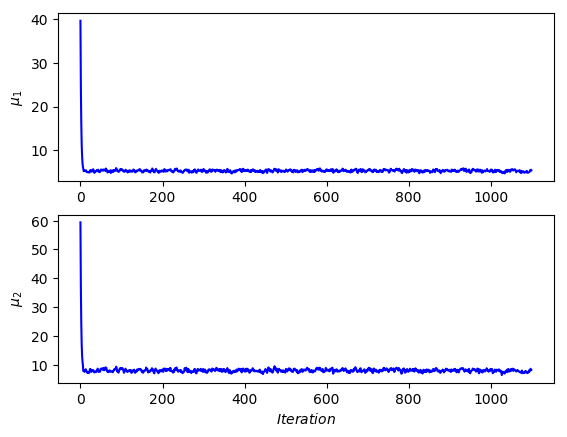

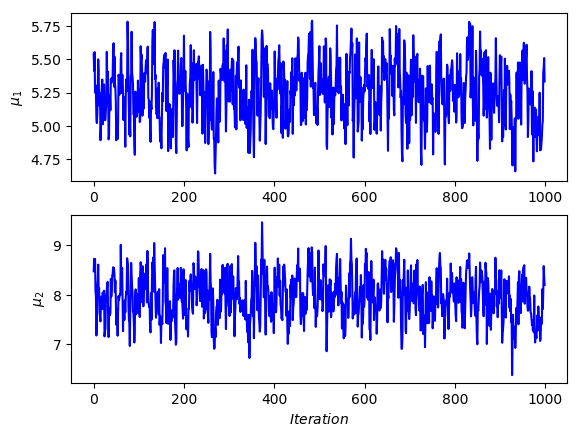

PyObject Text(47,0.5,'$\\mu_2$')

In [29]:
# entier chain
PyPlot.figure()
PyPlot.subplot(211)
PyPlot.plot(post_samples[1,:], "b")
PyPlot.ylabel(L"\mu_1",fontsize=text_size)
PyPlot.subplot(212)
PyPlot.plot(post_samples[2,:], "b")
PyPlot.xlabel(L"Iteration",fontsize=text_size)
PyPlot.ylabel(L"\mu_2",fontsize=text_size)

# chain after burnin
PyPlot.figure()
PyPlot.subplot(211)
PyPlot.plot(post_samples[1,burn_in+1:end], "b")
PyPlot.ylabel(L"\mu_1",fontsize=text_size)
PyPlot.subplot(212)
PyPlot.plot(post_samples[2,burn_in+1:end], "b")
PyPlot.xlabel(L"Iteration",fontsize=text_size)
PyPlot.ylabel(L"\mu_2",fontsize=text_size)


Plot posterior statistics. 

In [22]:
println("Posterior (marginal) means:")
println(round.(mean(post_samples[:,burn_in+1:end],dims = 2); digits=3))

println("Posterior (marginal) std:")
println(round.(std(post_samples[:,burn_in+1:end],dims = 2); digits=3))


Posterior (marginal) means:
[5.255; 7.968]
Posterior (marginal) std:
[0.222; 0.45]


Plot marginal posteriors.

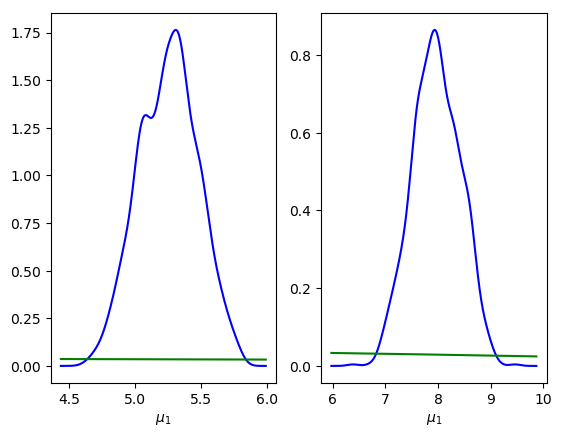

PyObject Text(0.5,25,'$\\mu_1$')

In [28]:
h1_μ_1 = kde(post_samples[1,burn_in+1:end])
h1_μ_2 = kde(post_samples[2,burn_in+1:end])

# marginal posteriors
PyPlot.figure()
PyPlot.subplot(121)
PyPlot.plot(h1_μ_1.x,h1_μ_1.density, "b")
PyPlot.plot(h1_μ_1.x,pdf.(dist_marginal_prior, h1_μ_1.x), "g")
PyPlot.xlabel(L"\mu_1",fontsize=text_size)
PyPlot.subplot(122)
PyPlot.plot(h1_μ_2.x,h1_μ_2.density, "b")
PyPlot.plot(h1_μ_2.x,pdf.(dist_marginal_prior, h1_μ_2.x), "g")
PyPlot.xlabel(L"\mu_1",fontsize=text_size)

## Second task: Find optimal action numerically 

Set utility function.

In [24]:
function utility(α, μ)

    ϕ = min(μ[1], μ[2])

    return -max(0, ϕ-α)-0.1*ϕ*α^2

end

utility (generic function with 1 method)

Set expected utility function.

In [25]:
function expected_utility(α, posterior_samples)

    N = size(posterior_samples,2)
    u_vec = zeros(N)

    for i = 1:N
        u_vec[i] = utility(α, posterior_samples[:,i])
    end


    return mean(u_vec)

end

expected_utility (generic function with 1 method)

Run numerical optimization.

In [26]:
obj_func(α) = -expected_utility(α[1], post_samples[:,burn_in+1:end]) # Optim does minimization, hence the minus sign

α_start = [10.]

opt = optimize(obj_func, α_start, BFGS())

α_tilde = Optim.minimizer(opt);

Print optimal action. 

In [27]:
println("Optimal action:")
println(round.(α_tilde; digits=3))


Optimal action:
[0.952]
